In [22]:
!pip -q install kaggle xgboost imbalanced-learn

In [23]:
import os, sys, warnings
warnings.filterwarnings("ignore")

In [24]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, average_precision_score
import xgboost as xgb

In [25]:
import pandas as pd
from pathlib import Path

# ✅ Update to your local path
DATA_DIR = Path(r"C:\Users\AK\OneDrive\Desktop\FraudDetection\fraudradar-app\fraudradar-app-main\data")

# Load all datasets
train_map = pd.read_csv(DATA_DIR / "Train-1542865627584.csv")
train_bene = pd.read_csv(DATA_DIR / "Train_Beneficiarydata-1542865627584.csv")
train_ip = pd.read_csv(DATA_DIR / "Train_Inpatientdata-1542865627584.csv", low_memory=False)
train_op = pd.read_csv(DATA_DIR / "Test_Outpatientdata-1542969243754.csv", low_memory=False)

# Quick peek at the data
print(train_map.head())
print(train_bene.head())
print(train_ip.head())
print(train_op.head())


   Provider PotentialFraud
0  PRV51001             No
1  PRV51003            Yes
2  PRV51004             No
3  PRV51005            Yes
4  PRV51007             No
      BeneID         DOB  DOD  Gender  Race RenalDiseaseIndicator  State  \
0  BENE11001  1943-01-01  NaN       1     1                     0     39   
1  BENE11002  1936-09-01  NaN       2     1                     0     39   
2  BENE11003  1936-08-01  NaN       1     1                     0     52   
3  BENE11004  1922-07-01  NaN       1     1                     0     39   
4  BENE11005  1935-09-01  NaN       1     1                     0     24   

   County  NoOfMonths_PartACov  NoOfMonths_PartBCov  ...  \
0     230                   12                   12  ...   
1     280                   12                   12  ...   
2     590                   12                   12  ...   
3     270                   12                   12  ...   
4     680                   12                   12  ...   

   ChronicCond_Depre

In [26]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [27]:
DATA_DIR = Path('/content/data')
DATA_DIR.mkdir(parents=True, exist_ok=True)

In [28]:
!kaggle datasets download -d rohitrox/healthcare-provider-fraud-detection-analysis -p /content/data

Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\AK\OneDrive\Desktop\FraudDetection\.venv\Scripts\kaggle.exe\__main__.py", line 6, in <module>
    sys.exit(main())
             ~~~~^^
  File "c:\Users\AK\OneDrive\Desktop\FraudDetection\.venv\Lib\site-packages\kaggle\cli.py", line 68, in main
    out = args.func(**command_args)
  File "c:\Users\AK\OneDrive\Desktop\FraudDetection\.venv\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 1741, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\Users\AK\OneDrive\Desktop\FraudDetection\.venv\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [29]:
from pathlib import Path

DATA_DIR = Path(r"C:\Users\ADISH\Documents\VS CODE\fraudradar-app\fraudradar-app-main\data")

In [30]:
fn_train = 'Train-1542865627584.csv'
fn_bene  = 'Train_Beneficiarydata-1542865627584.csv'
fn_ip    = 'Train_Inpatientdata-1542865627584.csv'
fn_op    = 'Train_Outpatientdata-1542865627584.csv'

fn_test       = 'Test-1542969243754.csv'
fn_test_bene  = 'Test_Beneficiarydata-1542969243754.csv'
fn_test_ip    = 'Test_Inpatientdata-1542969243754.csv'
fn_test_op    = 'Test_Outpatientdata-1542969243754.csv'

In [31]:
from pathlib import Path
import pandas as pd

# Your real data folder
DATA_DIR = Path(r"C:\Users\AK\OneDrive\Desktop\FraudDetection\fraudradar-app\fraudradar-app-main\data")

# Define filenames
fn_train = "Train-1542865627584.csv"
fn_bene = "Train_Beneficiarydata-1542865627584.csv"
fn_ip   = "Train_Inpatientdata-1542865627584.csv"
fn_op   = "Test_Outpatientdata-1542969243754.csv"

# Load datasets
train_map = pd.read_csv(DATA_DIR / fn_train)
train_bene = pd.read_csv(DATA_DIR / fn_bene)
train_ip = pd.read_csv(DATA_DIR / fn_ip, low_memory=False)
train_op = pd.read_csv(DATA_DIR / fn_op, low_memory=False)

# Quick check
print(train_map.shape, train_bene.shape, train_ip.shape, train_op.shape)


(5410, 2) (138556, 25) (40474, 30) (125841, 27)


In [32]:
test_map = pd.read_csv(DATA_DIR / fn_test)
test_bene = pd.read_csv(DATA_DIR / fn_test_bene)
test_ip = pd.read_csv(DATA_DIR / fn_test_ip, low_memory=False)
test_op = pd.read_csv(DATA_DIR / fn_test_op, low_memory=False)

In [33]:
print('Train mapping (Provider, PotentialFraud):', train_map.shape)
print('Train Beneficiary:', train_bene.shape)
print('Train Inpatient:', train_ip.shape)
print('Train Outpatient:', train_op.shape)
print('Test mapping (Provider only):', test_map.shape)

Train mapping (Provider, PotentialFraud): (5410, 2)
Train Beneficiary: (138556, 25)
Train Inpatient: (40474, 30)
Train Outpatient: (125841, 27)
Test mapping (Provider only): (1353, 1)


In [34]:
for df in [train_ip, train_op, test_ip, test_op]:
    # Safe parse dates if columns exist
    for c in ['ClaimStartDt', 'ClaimEndDt', 'AdmissionDt', 'DischargeDt', 'DOB', 'DOD']:
        if c in df.columns:
            df[c] = pd.to_datetime(df[c], errors='coerce')

# In beneficiary data, ChronicCond_* columns are typically encoded {1: Yes, 2: No}
chronic_cols = [c for c in train_bene.columns if c.startswith('ChronicCond_')]
if chronic_cols:
    for c in chronic_cols:
        train_bene[c] = (train_bene[c] == 1).astype(int)
        if c in test_bene.columns:
            test_bene[c] = (test_bene[c] == 1).astype(int)

# Some flags may be 'Y'/'N' strings (e.g., RenalDiseaseIndicator)
if 'RenalDiseaseIndicator' in train_bene.columns:
    train_bene['RenalDiseaseIndicator'] = (train_bene['RenalDiseaseIndicator'].astype(str).str.upper() == 'Y').astype(int)
if 'RenalDiseaseIndicator' in test_bene.columns:
    test_bene['RenalDiseaseIndicator'] = (test_bene['RenalDiseaseIndicator'].astype(str).str.upper() == 'Y').astype(int)

# Helper: compute claim duration days from ClaimStartDt → ClaimEndDt

def add_claim_duration_days(df):
    for s,e in [('ClaimStartDt','ClaimEndDt'), ('AdmissionDt','DischargeDt')]:
        if s in df.columns and e in df.columns:
            dur = (df[e] - df[s]).dt.days
            df[f'{s}_to_{e}_days'] = dur.clip(lower=0)
    return df

train_ip = add_claim_duration_days(train_ip)
train_op = add_claim_duration_days(train_op)

test_ip  = add_claim_duration_days(test_ip)
test_op  = add_claim_duration_days(test_op)

In [35]:
# Common numeric columns we can safely aggregate if present
numeric_cols_ip = [c for c in ['InscClaimAmtReimbursed','DeductibleAmtPaid','ClaimStartDt_to_ClaimEndDt_days'] if c in train_ip.columns]
numeric_cols_op = [c for c in ['InscClaimAmtReimbursed','DeductibleAmtPaid','ClaimStartDt_to_ClaimEndDt_days'] if c in train_op.columns]

# Basic aggregations for inpatient & outpatient
agg_fns = ['count','nunique','sum','mean','std','min','max']

# Inpatient aggregates per Provider
ip_grp = train_ip.copy()
if 'Provider' not in ip_grp.columns:
    raise ValueError('"Provider" column not found in inpatient file')

ip_agg = ip_grp.groupby('Provider').agg({
    **({ 'ClaimID':'nunique'} if 'ClaimID' in ip_grp.columns else {}),
    **({ 'BeneID':'nunique'} if 'BeneID' in ip_grp.columns else {}),
})
ip_agg = ip_agg.rename(columns={'ClaimID':'IP_claims_nunique','BeneID':'IP_bene_nunique'})

for c in numeric_cols_ip:
    tmp = ip_grp.groupby('Provider')[c].agg(agg_fns)
    tmp.columns = [f'IP_{c}_{fn}' for fn in agg_fns]
    ip_agg = ip_agg.join(tmp, how='left')

# Outpatient aggregates per Provider
op_grp = train_op.copy()
op_agg = op_grp.groupby('Provider').agg({
    **({ 'ClaimID':'nunique'} if 'ClaimID' in op_grp.columns else {}),
    **({ 'BeneID':'nunique'} if 'BeneID' in op_grp.columns else {}),
})
op_agg = op_agg.rename(columns={'ClaimID':'OP_claims_nunique','BeneID':'OP_bene_nunique'})

for c in numeric_cols_op:
    tmp = op_grp.groupby('Provider')[c].agg(agg_fns)
    tmp.columns = [f'OP_{c}_{fn}' for fn in agg_fns]
    op_agg = op_agg.join(tmp, how='left')

# Merge inpatient & outpatient aggregates
prov_feats = ip_agg.join(op_agg, how='outer').fillna(0)

# Ratios & totals
for a,b,name in [
    ('IP_claims_nunique','OP_claims_nunique','ratio_ip_to_op_claims'),
    ('IP_bene_nunique','OP_bene_nunique','ratio_ip_to_op_benes'),
]:
    if a in prov_feats.columns and b in prov_feats.columns:
        prov_feats[name] = prov_feats[a] / (prov_feats[b] + 1e-6)

# Total claims & reimbursed sums
for part in ['IP','OP']:
    if f'{part}_InscClaimAmtReimbursed_sum' not in prov_feats.columns:
        prov_feats[f'{part}_InscClaimAmtReimbursed_sum'] = 0

prov_feats['total_reimbursed_sum'] = prov_feats['IP_InscClaimAmtReimbursed_sum'] + prov_feats['OP_InscClaimAmtReimbursed_sum']
prov_feats['total_claims'] = prov_feats.get('IP_claims_nunique',0) + prov_feats.get('OP_claims_nunique',0)

# Merge in beneficiary-level health mix per Provider (via claims→BeneID→Beneficiary table)
# We build a mapping Provider -> set of BeneID seen in IP/OP claims, then average chronic flags, gender, etc.

# Collect Provider–BeneID pairs from IP and OP
bene_pairs = []
for df in [train_ip[['Provider','BeneID']] if set(['Provider','BeneID']).issubset(train_ip.columns) else None,
           train_op[['Provider','BeneID']] if set(['Provider','BeneID']).issubset(train_op.columns) else None]:
    if df is not None:
        bene_pairs.append(df.dropna().drop_duplicates())

if bene_pairs:
    prov_bene = pd.concat(bene_pairs, ignore_index=True).drop_duplicates()
else:
    prov_bene = pd.DataFrame(columns=['Provider','BeneID'])

# Attach beneficiary attributes
bene_cols_to_use = ['BeneID','Gender','Race','RenalDiseaseIndicator'] + chronic_cols
bene_merge = prov_bene.merge(train_bene[bene_cols_to_use], on='BeneID', how='left') if not prov_bene.empty else pd.DataFrame(columns=['Provider'])

# Aggregate beneficiary attributes per Provider
if not bene_merge.empty:
    bene_agg = bene_merge.groupby('Provider').agg({
        **({'Gender':'mean'} if 'Gender' in bene_merge.columns else {}),
        **({'Race':'mean'} if 'Race' in bene_merge.columns else {}),
        **({'RenalDiseaseIndicator':'mean'} if 'RenalDiseaseIndicator' in bene_merge.columns else {}),
        **{c:'mean' for c in chronic_cols}
    })
    # Rename to prefix
    bene_agg.columns = [f'bene_{c}_mean' for c in bene_agg.columns]
    prov_feats = prov_feats.join(bene_agg, how='left')

prov_feats = prov_feats.fillna(0)
print('Provider feature matrix shape:', prov_feats.shape)

# Create training table by joining labels (PotentialFraud)
labels = train_map.set_index('Provider')['PotentialFraud'].map({'Yes':1,'No':0})
train_df = prov_feats.join(labels, how='inner')

print('Train table shape:', train_df.shape)
train_df.head(3)

Provider feature matrix shape: (3351, 64)
Train table shape: (2092, 65)


,IP_claims_nunique,IP_bene_nunique,IP_InscClaimAmtReimbursed_count,IP_InscClaimAmtReimbursed_nunique,IP_InscClaimAmtReimbursed_sum,IP_InscClaimAmtReimbursed_mean,IP_InscClaimAmtReimbursed_std,IP_InscClaimAmtReimbursed_min,IP_InscClaimAmtReimbursed_max,IP_DeductibleAmtPaid_count,...,bene_ChronicCond_KidneyDisease_mean,bene_ChronicCond_Cancer_mean,bene_ChronicCond_ObstrPulmonary_mean,bene_ChronicCond_Depression_mean,bene_ChronicCond_Diabetes_mean,bene_ChronicCond_IschemicHeart_mean,bene_ChronicCond_Osteoporasis_mean,bene_ChronicCond_rheumatoidarthritis_mean,bene_ChronicCond_stroke_mean,PotentialFraud
Provider,,,,,,,,,,,,,,,,,,,,,
PRV51001,5.0,5.0,5.0,5.0,97000.0,19400.000000,18352.111595,3000.0,42000.0,5.0,...,0.800000,0.200000,0.400000,0.800000,0.800000,0.800000,0.000000,0.600000,0.400000,0
PRV51003,62.0,53.0,62.0,18.0,573000.0,9241.935484,8513.606244,0.0,57000.0,62.0,...,0.584906,0.132075,0.339623,0.396226,0.754717,0.867925,0.226415,0.283019,0.094340,1
PRV51007,3.0,3.0,3.0,3.0,19000.0,6333.333333,3511.884584,3000.0,10000.0,3.0,...,0.333333,0.000000,0.000000,0.666667,1.000000,1.000000,0.000000,0.333333,0.666667,0


In [36]:
# Separate features & target
feature_cols = [c for c in train_df.columns if c != 'PotentialFraud']
X = train_df[feature_cols].astype(float)
y = train_df['PotentialFraud'].astype(int)

# Stratified split
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance: scale_pos_weight = (neg/pos)
pos = y_tr.sum()
neg = len(y_tr) - pos
scale_pos_weight = (neg / max(pos,1))
scale_pos_weight

np.float64(3.752840909090909)

In [37]:
# Train XGBoost
clf = xgb.XGBClassifier(
    n_estimators=600,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.9,
    reg_alpha=0.0,
    reg_lambda=1.0,
    random_state=42,
    tree_method='hist',
    n_jobs=-1,
    eval_metric='auc',
    scale_pos_weight=scale_pos_weight,
)

clf.fit(X_tr, y_tr,
        eval_set=[(X_tr, y_tr), (X_val, y_val)],
        verbose=False)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.9
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, average_precision_score

proba = clf.predict_proba(X_val)[:,1]
pred = (proba >= 0.5).astype(int)

print('Confusion Matrix')
print(confusion_matrix(y_val, pred))

print('\nClassification Report')
print(classification_report(y_val, pred, digits=4))

print('ROC-AUC:', round(roc_auc_score(y_val, proba), 4))
print('PR-AUC:', round(average_precision_score(y_val, proba), 4))


Confusion Matrix
[[308  23]
 [ 30  58]]

Classification Report
              precision    recall  f1-score   support

           0     0.9112    0.9305    0.9208       331
           1     0.7160    0.6591    0.6864        88

    accuracy                         0.8735       419
   macro avg     0.8136    0.7948    0.8036       419
weighted avg     0.8702    0.8735    0.8716       419

ROC-AUC: 0.8907
PR-AUC: 0.744


In [39]:
!pip install matplotlib


   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 3.0 MB/s eta 0:00:03
   -------------- ------------------------- 2.9/8.1 MB 5.1 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 6.0 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 6.0 MB/s eta 0:00:01
   ------------------------------------ --- 7.3/8.1 MB 6.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.1 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   -------------------------------- ------- 1.8/2.3 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.6 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ---------- ----------------------------- 1.8/7.0 MB 9.7 MB/s eta 0:00:01
   ------------------- -------------------- 3.

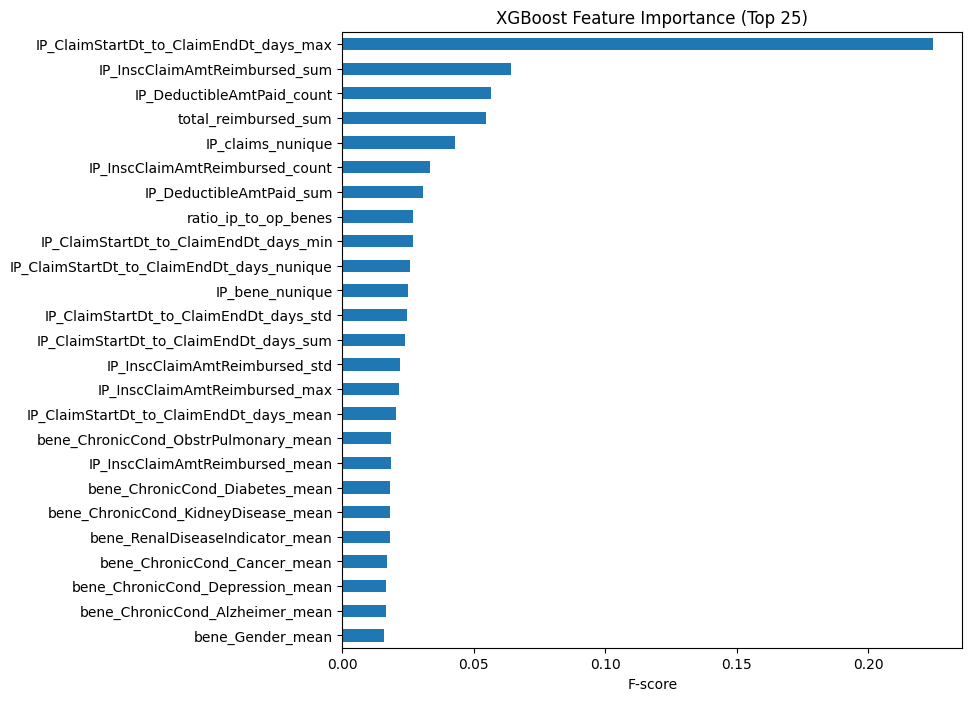

In [40]:
import matplotlib.pyplot as plt

importances = pd.Series(clf.feature_importances_, index=feature_cols).sort_values(ascending=False)

TOP = 25
ax = importances.head(TOP).iloc[::-1].plot(kind='barh', figsize=(8,8))
ax.set_title('XGBoost Feature Importance (Top 25)')
ax.set_xlabel('F-score')
plt.show()

In [41]:
# === Build provider-level features for TEST ===
# Inpatient aggregates per Provider
ip_grp_t = test_ip.copy()
op_grp_t = test_op.copy()

# Reuse the same logic as training
numeric_cols_ip_t = [c for c in ['InscClaimAmtReimbursed','DeductibleAmtPaid','ClaimStartDt_to_ClaimEndDt_days'] if c in ip_grp_t.columns]
numeric_cols_op_t = [c for c in ['InscClaimAmtReimbursed','DeductibleAmtPaid','ClaimStartDt_to_ClaimEndDt_days'] if c in op_grp_t.columns]

ip_agg_t = ip_grp_t.groupby('Provider').agg({
    **({ 'ClaimID':'nunique'} if 'ClaimID' in ip_grp_t.columns else {}),
    **({ 'BeneID':'nunique'} if 'BeneID' in ip_grp_t.columns else {}),
})
ip_agg_t = ip_agg_t.rename(columns={'ClaimID':'IP_claims_nunique','BeneID':'IP_bene_nunique'})

for c in numeric_cols_ip_t:
    tmp = ip_grp_t.groupby('Provider')[c].agg(agg_fns)
    tmp.columns = [f'IP_{c}_{fn}' for fn in agg_fns]
    ip_agg_t = ip_agg_t.join(tmp, how='left')

op_agg_t = op_grp_t.groupby('Provider').agg({
    **({ 'ClaimID':'nunique'} if 'ClaimID' in op_grp_t.columns else {}),
    **({ 'BeneID':'nunique'} if 'BeneID' in op_grp_t.columns else {}),
})
op_agg_t = op_agg_t.rename(columns={'ClaimID':'OP_claims_nunique','BeneID':'OP_bene_nunique'})

for c in numeric_cols_op_t:
    tmp = op_grp_t.groupby('Provider')[c].agg(agg_fns)
    tmp.columns = [f'OP_{c}_{fn}' for fn in agg_fns]
    op_agg_t = op_agg_t.join(tmp, how='left')

prov_feats_t = ip_agg_t.join(op_agg_t, how='outer').fillna(0)

In [42]:
for a,b,name in [
    ('IP_claims_nunique','OP_claims_nunique','ratio_ip_to_op_claims'),
    ('IP_bene_nunique','OP_bene_nunique','ratio_ip_to_op_benes'),
]:
    if a in prov_feats_t.columns and b in prov_feats_t.columns:
        prov_feats_t[name] = prov_feats_t[a] / (prov_feats_t[b] + 1e-6)

for part in ['IP','OP']:
    if f'{part}_InscClaimAmtReimbursed_sum' not in prov_feats_t.columns:
        prov_feats_t[f'{part}_InscClaimAmtReimbursed_sum'] = 0

prov_feats_t['total_reimbursed_sum'] = prov_feats_t['IP_InscClaimAmtReimbursed_sum'] + prov_feats_t['OP_InscClaimAmtReimbursed_sum']
prov_feats_t['total_claims'] = prov_feats_t.get('IP_claims_nunique',0) + prov_feats_t.get('OP_claims_nunique',0)

# Provider→BeneID pairs (test) for beneficiary aggregates
bene_pairs_t = []
for df in [test_ip[['Provider','BeneID']] if set(['Provider','BeneID']).issubset(test_ip.columns) else None,
           test_op[['Provider','BeneID']] if set(['Provider','BeneID']).issubset(test_op.columns) else None]:
    if df is not None:
        bene_pairs_t.append(df.dropna().drop_duplicates())

if bene_pairs_t:
    prov_bene_t = pd.concat(bene_pairs_t, ignore_index=True).drop_duplicates()
else:
    prov_bene_t = pd.DataFrame(columns=['Provider','BeneID'])

bene_merge_t = prov_bene_t.merge(test_bene[['BeneID','Gender','Race','RenalDiseaseIndicator'] + chronic_cols], on='BeneID', how='left') if not prov_bene_t.empty else pd.DataFrame(columns=['Provider'])

if not bene_merge_t.empty:
    bene_agg_t = bene_merge_t.groupby('Provider').agg({
        **({'Gender':'mean'} if 'Gender' in bene_merge_t.columns else {}),
        **({'Race':'mean'} if 'Race' in bene_merge_t.columns else {}),
        **({'RenalDiseaseIndicator':'mean'} if 'RenalDiseaseIndicator' in bene_merge_t.columns else {}),
        **{c:'mean' for c in chronic_cols}
    })
    bene_agg_t.columns = [f'bene_{c}_mean' for c in bene_agg_t.columns]
    prov_feats_t = prov_feats_t.join(bene_agg_t, how='left')

prov_feats_t = prov_feats_t.fillna(0)

# Align test features with training feature columns
X_test = prov_feats_t.reindex(columns=feature_cols, fill_value=0).astype(float)

# Predict
proba_test = clf.predict_proba(X_test)[:,1]
pred_test = (proba_test >= 0.5).astype(int)

# Build submission: Provider, PotentialFraud (Yes/No)
sub = pd.DataFrame({
    'Provider': X_test.index,
    'PotentialFraud': np.where(pred_test==1, 'Yes', 'No')
}).reset_index(drop=True)


In [43]:
OUT_PATH = '/content/fraud_predictions_xgb.csv'
sub.to_csv(OUT_PATH, index=False)
print('Saved:', OUT_PATH, 'Rows:', len(sub))
sub.head()

Saved: /content/fraud_predictions_xgb.csv Rows: 1353


,Provider,PotentialFraud
0,PRV51002,No
1,PRV51006,No
2,PRV51009,No
3,PRV51010,No
4,PRV51018,No


In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
param_grid = {
    'n_estimators': [300, 600, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 5, 10],
}

search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_grid,
    n_iter=30,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X, y)
print("Best params:", search.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best params: {'subsample': 1.0, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 1.0}


In [46]:
from sklearn.metrics import precision_recall_curve

proba_val = clf.predict_proba(X_val)[:,1]
prec, rec, thresh = precision_recall_curve(y_val, proba_val)

f1_scores = 2*prec*rec/(prec+rec+1e-6)
best_thresh = thresh[f1_scores.argmax()]
print("Best threshold:", best_thresh)


Best threshold: 0.25593576


In [47]:
!pip install shap
!pip install numpy==2.2.6



   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 7.4 MB/s  0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------------------------- -------------- 1.8/2.8 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 8.7 MB/s  0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
   -- ------------------------------------- 1.8/30.3 MB 9.8 MB/s eta 0:00:03
   --- ------------------------------------ 2.9/30.3 MB 8.8 MB/s eta 0:00:04
   ------ --------------------------------- 4.7/30.3 MB 7.9 MB/s eta 0:00:04
   -------- ------------------------------- 6.8/30.3 MB 8.4 MB/s eta 0:00:03
   ----------- ---------------------------- 8.7/30.3 MB 8.6 MB/s eta 0:00:03
   ------------- -------------------------- 10.5/30.3 MB 8.7 MB/s eta 0:00:03
   ---------------- ----------------------- 12.6/30.3 MB 8.9 MB/s eta 0:00:02
   -------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [48]:
import numpy as np
print(np.__version__) 

2.3.2


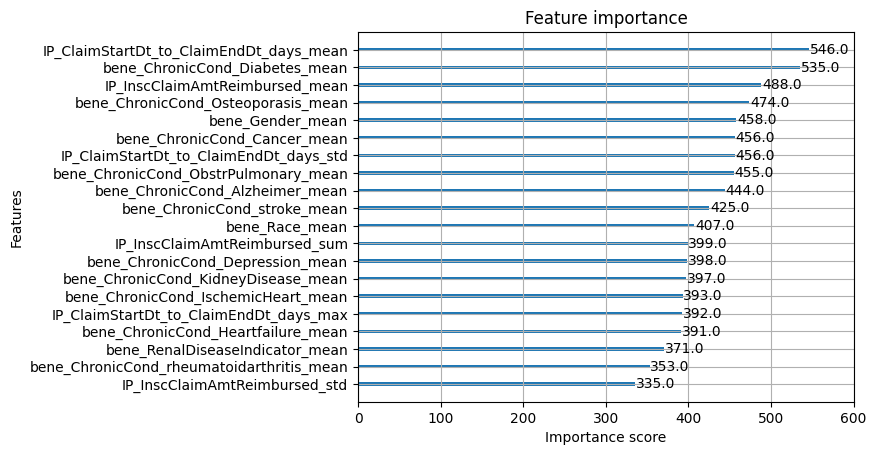

In [49]:
# import shap
# explainer = shap.TreeExplainer(clf)
# shap_values = explainer.shap_values(X_val)

# shap.summary_plot(shap_values, X_val, max_display=20)

import xgboost as xgb
xgb.plot_importance(clf, max_num_features=20)
plt.show()



In [50]:
import joblib
joblib.dump(clf, "xgb_fraud_model.pkl")


['xgb_fraud_model.pkl']

In [51]:
def predict_provider_fraud(provider_features):
    df = pd.DataFrame([provider_features])
    proba = clf.predict_proba(df)[:,1][0]
    return {"fraud_probability": proba,
            "fraud_flag": "Yes" if proba > best_thresh else "No"}


In [52]:
# == A1. Setup CV + param search ==
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from scipy.stats import randint, uniform
import numpy as np

# Recompute scale_pos_weight on full train (X, y from Step 5)
pos = int(y.sum())
neg = int(len(y) - pos)
base_spw = max(1.0, neg / max(pos, 1))

xgb_base = xgb.XGBClassifier(
    tree_method="hist",
    random_state=42,
    n_jobs=-1,
    eval_metric="auc",
    scale_pos_weight=base_spw  # good default; we’ll also allow tuning around it
)

param_distributions = {
    "n_estimators": randint(400, 1200),
    "max_depth": randint(3, 8),
    "learning_rate": uniform(0.01, 0.12),      # 0.01–0.13
    "subsample": uniform(0.6, 0.4),            # 0.6–1.0
    "colsample_bytree": uniform(0.6, 0.4),     # 0.6–1.0
    "min_child_weight": randint(1, 8),
    "gamma": uniform(0.0, 5.0),
    "reg_alpha": uniform(0.0, 1.0),
    "reg_lambda": uniform(0.5, 9.5),
    # allow searching around class imbalance setting
    "scale_pos_weight": uniform(max(1.0, base_spw*0.5), max(1.0, base_spw*1.5))
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_distributions,
    n_iter=40,                # increase if you have time
    scoring="roc_auc",
    cv=cv,
    verbose=1,
    n_jobs=-1,
    random_state=42,
    refit=True
)

search.fit(X, y)
print("Best AUC params:", search.best_params_)
print("Best CV ROC-AUC:", search.best_score_)
best_model = search.best_estimator_


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best AUC params: {'colsample_bytree': np.float64(0.8391599915244341), 'gamma': np.float64(4.609371175115584), 'learning_rate': np.float64(0.02061910024623034), 'max_depth': 6, 'min_child_weight': 1, 'n_estimators': 1101, 'reg_alpha': np.float64(0.32533033076326434), 'reg_lambda': np.float64(4.192434252050079), 'scale_pos_weight': np.float64(3.405461138035714), 'subsample': np.float64(0.9314950036607718)}
Best CV ROC-AUC: 0.9007861226935658


In [53]:
# == B1. Hold-out validation from your earlier split (X_tr, X_val, y_tr, y_val) ==
# If you've overwritten them, quickly rebuild:
# from sklearn.model_selection import train_test_split
# X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, f1_score

# Fit best_model on training split
best_model.fit(X_tr, y_tr)

# Optional: probability calibration (sigmoid usually stable; isotonic if enough data)
cal = CalibratedClassifierCV(best_model, cv=3, method="sigmoid")
cal.fit(X_tr, y_tr)

# Evaluate on validation
proba_val = cal.predict_proba(X_val)[:, 1]
roc = roc_auc_score(y_val, proba_val)
prauc = average_precision_score(y_val, proba_val)
print(f"Post-calibration ROC-AUC: {roc:.4f} | PR-AUC: {prauc:.4f}")

# Search best threshold by F1 (change metric if needed)
prec, rec, thr = precision_recall_curve(y_val, proba_val)
f1s = 2*prec*rec/(prec+rec+1e-6)
ix = np.nanargmax(f1s)
best_thresh = thr[ix]
print(f"Best threshold for F1: {best_thresh:.4f} | Precision={prec[ix]:.4f} | Recall={rec[ix]:.4f} | F1={f1s[ix]:.4f}")


Post-calibration ROC-AUC: 0.9023 | PR-AUC: 0.7693
Best threshold for F1: 0.3697 | Precision=0.7234 | Recall=0.7727 | F1=0.7473


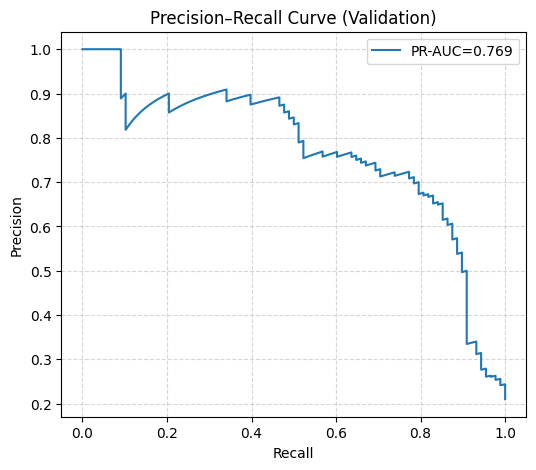

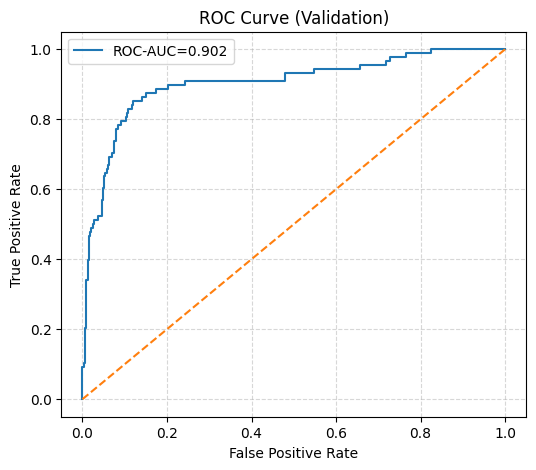

          Pred 0  Pred 1
Actual 0     305      26
Actual 1      20      68

Classification Report @best_thresh
               precision    recall  f1-score   support

           0     0.9385    0.9215    0.9299       331
           1     0.7234    0.7727    0.7473        88

    accuracy                         0.8902       419
   macro avg     0.8309    0.8471    0.8386       419
weighted avg     0.8933    0.8902    0.8915       419



In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix, classification_report
import numpy as np
import pandas as pd

# PR curve
prec, rec, thr = precision_recall_curve(y_val, proba_val)
plt.figure(figsize=(6,5))
plt.plot(rec, prec, label=f"PR-AUC={prauc:.3f}")
plt.xlabel("Recall"); plt.ylabel("Precision"); plt.title("Precision–Recall Curve (Validation)")
plt.legend(); plt.grid(True, ls="--", alpha=0.5)
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_val, proba_val)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC-AUC={roc:.3f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate"); plt.title("ROC Curve (Validation)")
plt.legend(); plt.grid(True, ls="--", alpha=0.5)
plt.show()

# Confusion matrix at best threshold
pred_val = (proba_val >= best_thresh).astype(int)
cm = confusion_matrix(y_val, pred_val)
cm_df = pd.DataFrame(cm, index=["Actual 0","Actual 1"], columns=["Pred 0","Pred 1"])
print(cm_df)
print("\nClassification Report @best_thresh\n", classification_report(y_val, pred_val, digits=4))


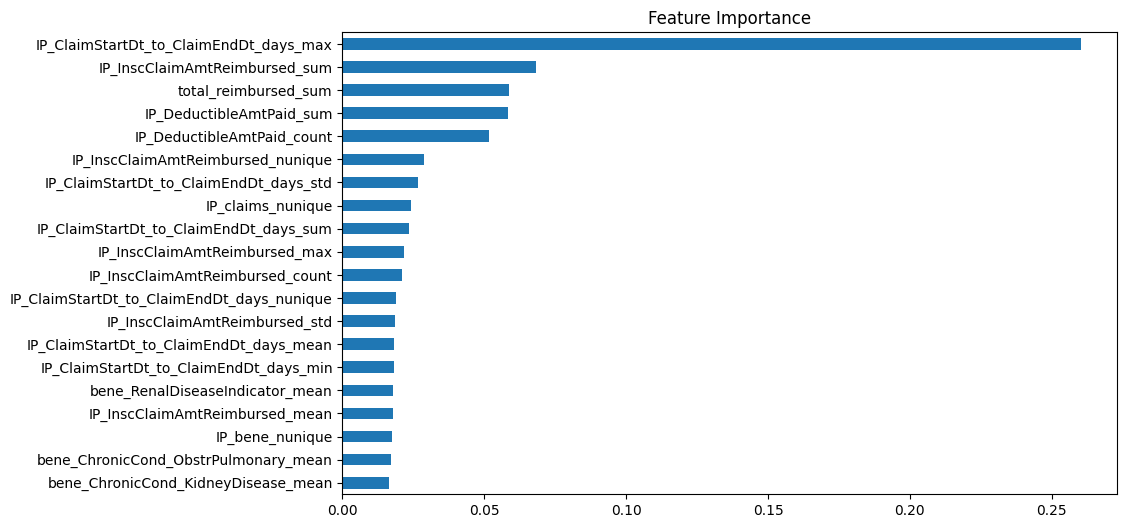

In [55]:
# !pip -q install shap

# import shap
# shap.initjs()

# # Use the calibrated model's underlying XGB for SHAP (tree explainer expects tree model)
# xgb_for_shap = best_model

# explainer = shap.TreeExplainer(xgb_for_shap)
# # Use a sample for speed if X_val is large
# X_shap = X_val.copy()
# sv = explainer.shap_values(X_shap)

# # 1) Global importance
# shap.summary_plot(sv, X_shap, max_display=20)

# # 2) Per-provider explanation (pick one flagged provider example)
# # Find a strongly positive sample (highest proba)
# top_idx = np.argsort(proba_val)[-1]
# shap.force_plot(explainer.expected_value, sv[top_idx], X_shap.iloc[top_idx,:])


import matplotlib.pyplot as plt
import pandas as pd

# Get feature importance scores
importances = best_model.feature_importances_

# Create a Series with feature names and importances
feat_importance = pd.Series(importances, index=X_val.columns)

# Sort descending
feat_importance = feat_importance.sort_values(ascending=False)

# Plot top 20 features
feat_importance[:20].plot(kind='barh', figsize=(10,6))
plt.gca().invert_yaxis()
plt.title("Feature Importance")
plt.show()



In [56]:
from sklearn.calibration import CalibratedClassifierCV
# and all other imports

# Assuming you have your data loaded in X, y
# and have run a hyperparameter search, with:
# search.best_estimator_ available

final_model = search.best_estimator_
final_model.fit(X, y)

final_cal = CalibratedClassifierCV(final_model, cv=5, method="sigmoid")
final_cal.fit(X, y)

best_thresh = 0.5  # or whatever your threshold is


In [ ]:
# import joblib
# from pathlib import Path
# import json

# # Retrain best model on ALL data
# final_model = search.best_estimator_
# final_model.fit(X, y)

# # Calibrate on a CV split of full data for robust probabilities
# final_cal = CalibratedClassifierCV(final_model, cv=5, method="sigmoid")
# final_cal.fit(X, y)

# ART_DIR = Path("/content/artifacts")
# ART_DIR.mkdir(exist_ok=True, parents=True)

# joblib.dump(final_model, ART_DIR / "xgb_fraud_model.pkl")
# joblib.dump(final_cal, ART_DIR / "xgb_fraud_model_calibrated.pkl")

# # Save feature order and threshold
# with open(ART_DIR / "feature_columns.json", "w") as f:
#     json.dump(list(X.columns), f)

# with open(ART_DIR / "decision_threshold.json", "w") as f:
#     json.dump({"best_threshold": float(best_thresh)}, f)

# print("Saved artifacts in:", ART_DIR)


from pathlib import Path
import joblib
import json

ART_DIR = Path(r"C:\Users\AK\OneDrive\Desktop\FraudDetection\fraudradar-app\fraudradar-app-main\backend-app-main\model")
ART_DIR.mkdir(exist_ok=True, parents=True)

joblib.dump(final_model, ART_DIR / "xgb_fraud_model.pkl")
joblib.dump(final_cal, ART_DIR / "xgb_fraud_model_calibrated.pkl")

with open(ART_DIR / "feature_columns.json", "w") as f:
    json.dump(list(X.columns), f)

with open(ART_DIR / "decision_threshold.json", "w") as f:
    json.dump({"best_threshold": float(best_thresh)}, f)

print("Saved artifacts in:", ART_DIR)




Saved artifacts in: C:\Users\AK\OneDrive\Desktop\FraudDetection\fraudradar-app\fraudradar-app-main\backend-app-main\model
